# Diabetes Detection using Flask

### Diabetes Detection using the Pima Indians Diabetes Dataset

### Context -

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Content -

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### Target -

Predict the onset of diabetes based on diagnostic measures.

## Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from warnings import filterwarnings
filterwarnings('ignore')

## Loading the Dataset

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## EDA (Exploratory Data Analysis)

In [4]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Here we have 768 rows of data and total 9 columns in which 2 are of float and 7 are of integer.

## Checking Missing Values

In [6]:
data.isna().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Here we don't have any missing values in the dataset.

## Five Point Summary

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Distribution of columns

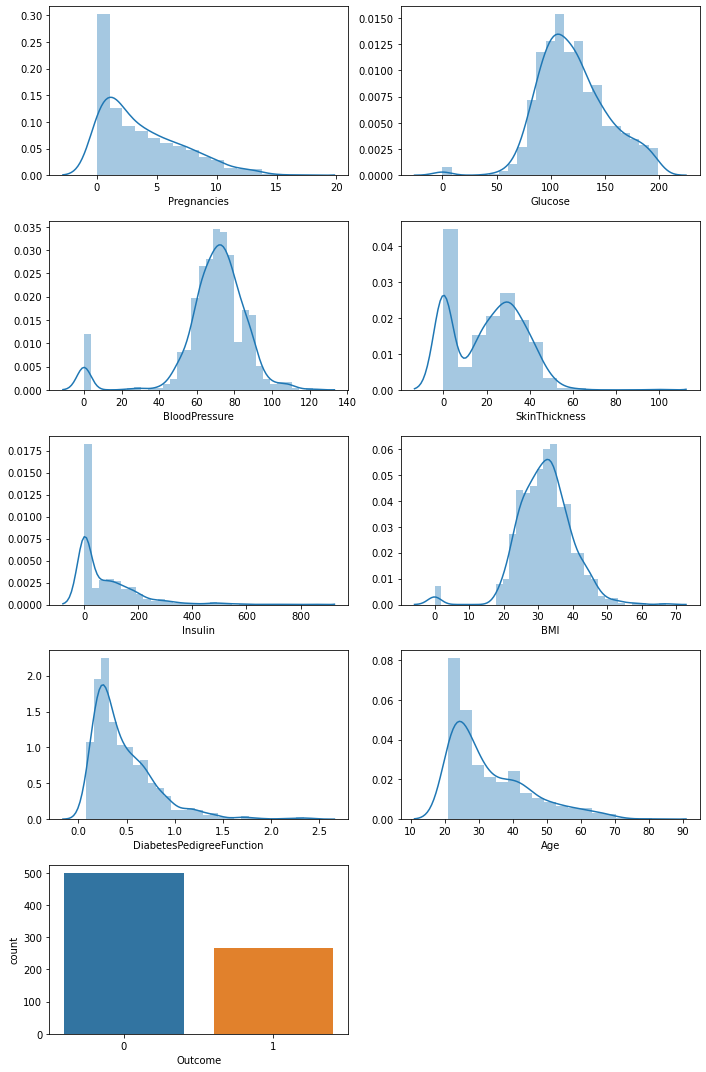

In [8]:
fig , axe = plt.subplots(nrows=5,ncols=2,figsize=(10,15))
axe = axe.flatten()
sns.distplot(data['Pregnancies'],ax=axe[0])
sns.distplot(data['Glucose'],ax=axe[1])
sns.distplot(data['BloodPressure'],ax=axe[2])
sns.distplot(data['SkinThickness'],ax=axe[3])
sns.distplot(data['Insulin'],ax=axe[4])
sns.distplot(data['BMI'],ax=axe[5])
sns.distplot(data['DiabetesPedigreeFunction'],ax=axe[6])
sns.distplot(data['Age'],ax=axe[7])
sns.countplot(data['Outcome'],ax=axe[8])
fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)


## Checking Outliers

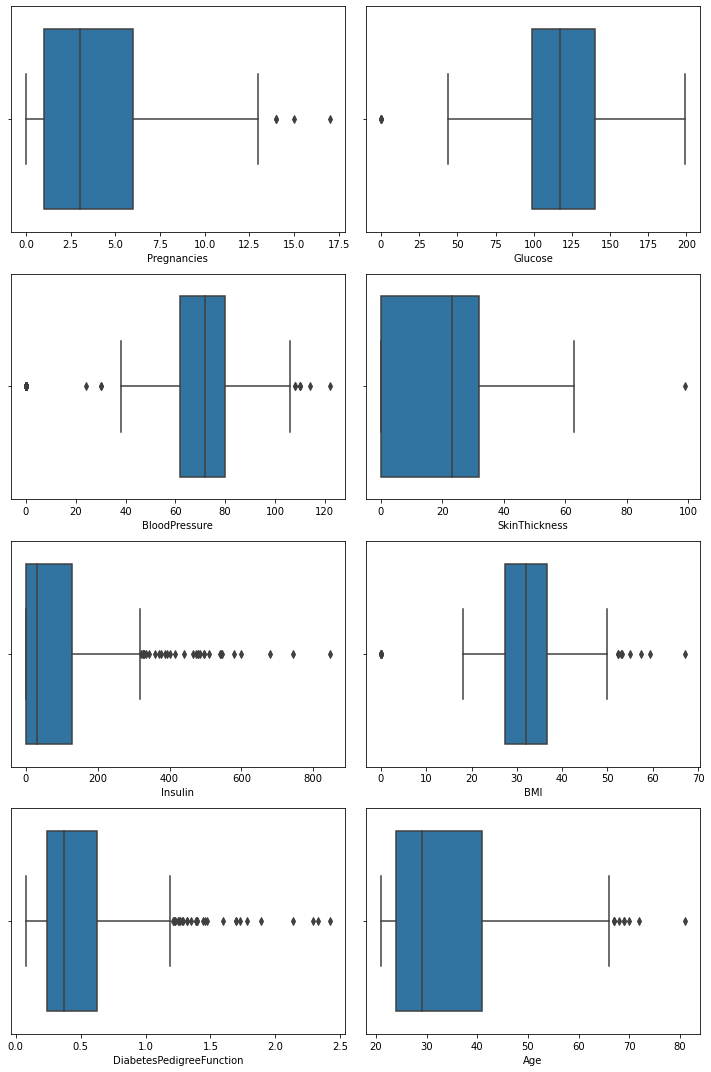

In [9]:
fig , axe = plt.subplots(nrows=4,ncols=2,figsize=(10,15))
axe = axe.flatten()
sns.boxplot(data['Pregnancies'],ax=axe[0])
sns.boxplot(data['Glucose'],ax=axe[1])
sns.boxplot(data['BloodPressure'],ax=axe[2])
sns.boxplot(data['SkinThickness'],ax=axe[3])
sns.boxplot(data['Insulin'],ax=axe[4])
sns.boxplot(data['BMI'],ax=axe[5])
sns.boxplot(data['DiabetesPedigreeFunction'],ax=axe[6])
sns.boxplot(data['Age'],ax=axe[7])
fig.tight_layout()
fig.show()

There are large number of Outliers are present in Insulin and DiabetesPedigreeFunction.

## Handling Outliers by Mean Replacement

In [10]:
data1 = data.copy()
mean_insulin = float(data1['Insulin'].mean())
data1['Insulin'] = np.where(data1['Insulin'] > np.percentile(data1['Insulin'],85),mean_insulin,data1['Insulin'])

In [11]:
mean_dpf = float(data1['DiabetesPedigreeFunction'].mean())
data1['DiabetesPedigreeFunction'] = np.where(data1['DiabetesPedigreeFunction'] > np.percentile(data1['DiabetesPedigreeFunction'],85),mean_dpf,data1['DiabetesPedigreeFunction'])

## Checking Outliers after Mean Replacement

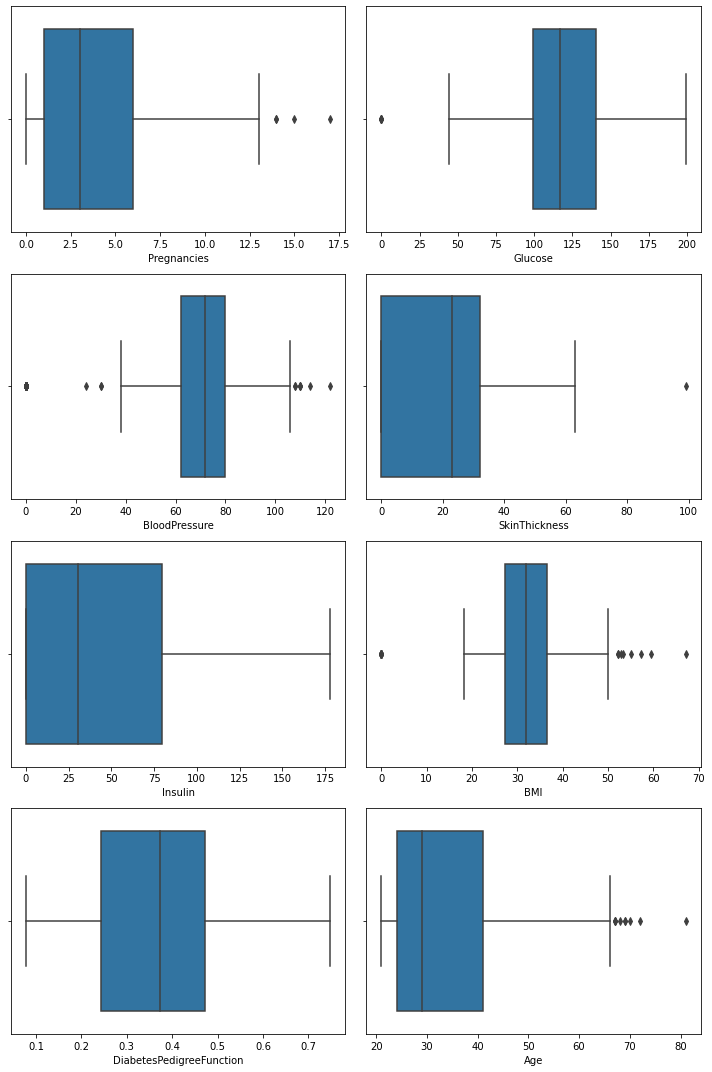

In [12]:
fig , axe = plt.subplots(nrows=4,ncols=2,figsize=(10,15))
axe = axe.flatten()
sns.boxplot(data1['Pregnancies'],ax=axe[0])
sns.boxplot(data1['Glucose'],ax=axe[1])
sns.boxplot(data1['BloodPressure'],ax=axe[2])
sns.boxplot(data1['SkinThickness'],ax=axe[3])
sns.boxplot(data1['Insulin'],ax=axe[4])
sns.boxplot(data1['BMI'],ax=axe[5])
sns.boxplot(data1['DiabetesPedigreeFunction'],ax=axe[6])
sns.boxplot(data1['Age'],ax=axe[7])
fig.tight_layout()
fig.show()


## Correlation of all features

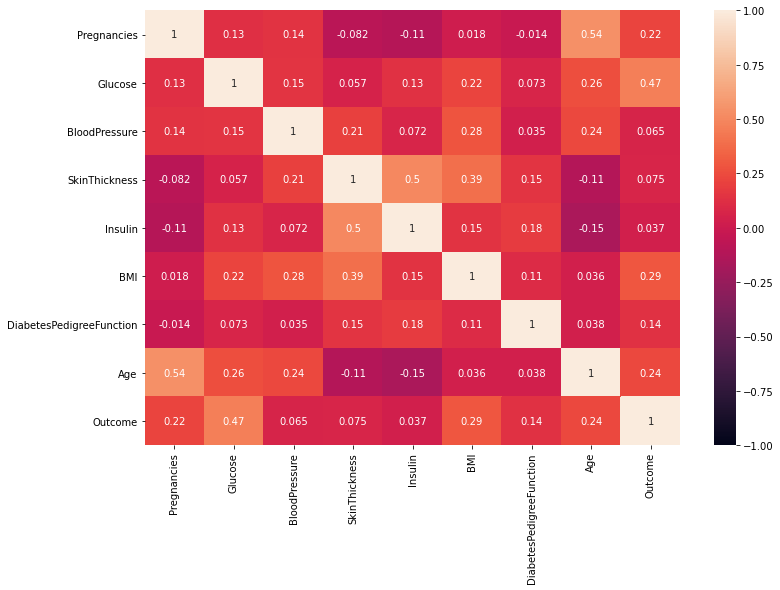

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(data1.corr(),annot=True,vmax=1,vmin=-1)

## Pairplot of all features

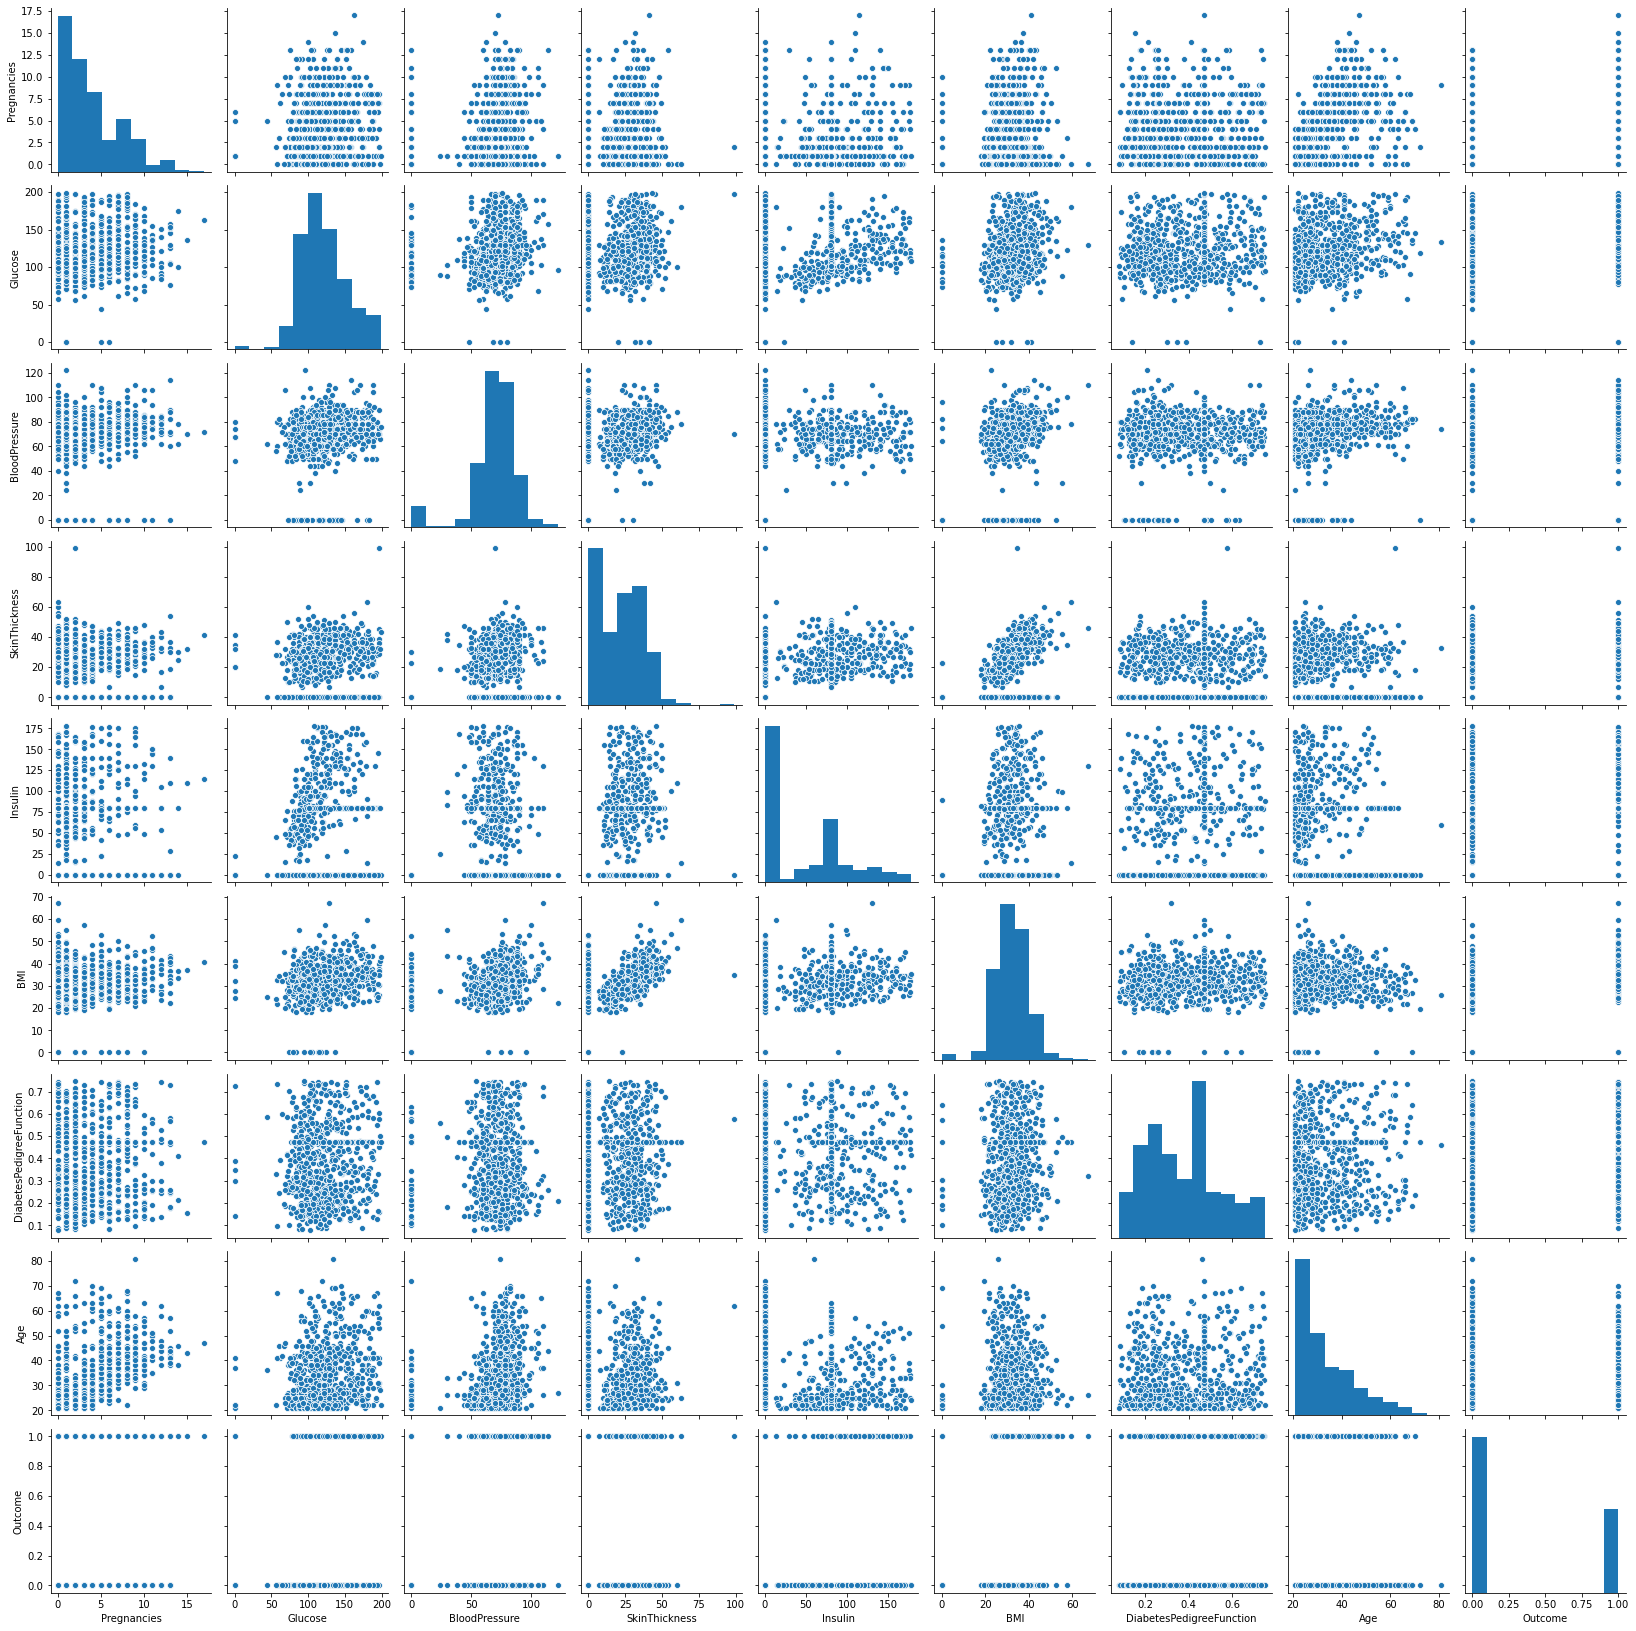

In [14]:
sns.pairplot(data1)

## Splitting the data for Train and Test (70:30)

In [15]:
X = data1.drop('Outcome',axis=1)
y = data1['Outcome']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

# Models

## Logistic Regression Model

In [16]:
logic_r = LogisticRegression(solver='liblinear')
logic_r.fit(X_train,y_train)
y_pred = logic_r.predict(X_test)
LR_accuracy = accuracy_score(y_test,y_pred)
print('\033[1m''*'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print('-'*40)
print('Accuracy of Logistic Regression :{:.2f}'.format(LR_accuracy))
print('-'*40)
print('\n Classification Report\n',classification_report(y_test,y_pred))
print('*'*63)

***************************************************************
Confusion Matrix
 [[132  14]
 [ 38  47]]
----------------------------------------
Accuracy of Logistic Regression :0.77
----------------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.78      0.90      0.84       146
           1       0.77      0.55      0.64        85

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231

***************************************************************


## Naive Bayes Model

In [17]:
NB = GaussianNB()
NB.fit(X_train,y_train)
y_pred = NB.predict(X_test)
NB_accuracy = accuracy_score(y_test,y_pred)
print('\033[1m''*'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print('-'*30)
print('Accuracy of Naive Bayes :{:.2f}'.format(NB_accuracy))
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,y_pred))
print('*'*63)

***************************************************************
Confusion Matrix
 [[123  23]
 [ 31  54]]
------------------------------
Accuracy of Naive Bayes :0.77
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.70      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.76      0.77      0.76       231

***************************************************************


## KNN Model

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
KNN_accuracy = accuracy_score(y_test,y_pred)
print('\033[1m''*'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print('-'*30)
print('Accuracy of KNN :{:.2f}'.format(KNN_accuracy))
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,y_pred))
print('*'*63)

***************************************************************
Confusion Matrix
 [[128  18]
 [ 36  49]]
------------------------------
Accuracy of KNN :0.77
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.78      0.88      0.83       146
           1       0.73      0.58      0.64        85

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.76      0.77      0.76       231

***************************************************************


## SVC Model

In [19]:
svc = SVC()
svc.fit(X_train,y_train)
predicted_svc = svc.predict(X_test)
SVC_accuracy = accuracy_score(y_test,predicted_svc)
print('\033[1m''*'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_svc))
print('-'*30)
print('Accuracy of SVC :',SVC_accuracy)
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_svc))
print('*'*63)

***************************************************************
Confusion Matrix
 [[136  10]
 [ 38  47]]
------------------------------
Accuracy of SVC : 0.7922077922077922
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.78      0.93      0.85       146
           1       0.82      0.55      0.66        85

    accuracy                           0.79       231
   macro avg       0.80      0.74      0.76       231
weighted avg       0.80      0.79      0.78       231

***************************************************************


## Decision Tree Model

In [20]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)
predicted_DT = dTree.predict(X_test)
DT_accuracy = accuracy_score(y_test,predicted_DT)
print('\033[1m''*'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_DT))
print('-'*30)
print('Accuracy of Decision Tree :{:.2f}'.format(DT_accuracy))
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_DT))
print('*'*63)

***************************************************************
Confusion Matrix
 [[110  36]
 [ 33  52]]
------------------------------
Accuracy of Decision Tree :0.70
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.77      0.75      0.76       146
           1       0.59      0.61      0.60        85

    accuracy                           0.70       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.70      0.70      0.70       231

***************************************************************


## Pruned Decision Tree Model

In [21]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
predicted_DTR = dTreeR.predict(X_test)
DTR_accuracy = accuracy_score(y_test,predicted_DTR)
print('\033[1m''*'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_DTR))
print('-'*30)
print('Accuracy of Decision Tree with Regularization:{:.2f}'.format(DTR_accuracy))
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_DTR))
print('*'*63)

***************************************************************
Confusion Matrix
 [[127  19]
 [ 37  48]]
------------------------------
Accuracy of Decision Tree with Regularization:0.76
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.77      0.87      0.82       146
           1       0.72      0.56      0.63        85

    accuracy                           0.76       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.75      0.76      0.75       231

***************************************************************


## Bagging Model

In [22]:
bagc = BaggingClassifier(base_estimator=dTree, n_estimators=500,random_state=1)
bagc = bagc.fit(X_train, y_train)
predicted_BAG = bagc.predict(X_test)
BAG_accuracy = accuracy_score(y_test,predicted_BAG)
print('\033[1m''*'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_BAG))
print('-'*30)
print('Accuracy of BaggingClassifier :{:.2f}'.format(BAG_accuracy))
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_BAG))
print('*'*63)

***************************************************************
Confusion Matrix
 [[127  19]
 [ 33  52]]
------------------------------
Accuracy of BaggingClassifier :0.77
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       146
           1       0.73      0.61      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231

***************************************************************


## Adaptive Boosting Model

In [23]:
adab = AdaBoostClassifier(n_estimators=50, random_state=1)
adab = adab.fit(X_train, y_train)
predicted_ADA = adab.predict(X_test)
ADA_accuracy = accuracy_score(y_test,predicted_ADA)
print('\033[1m''*'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_ADA))
print('-'*30)
print('Accuracy of AdaBoostClassifier :{:.2f}'.format(ADA_accuracy))
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_ADA))

***************************************************************
Confusion Matrix
 [[132  14]
 [ 31  54]]
------------------------------
Accuracy of AdaBoostClassifier :0.81
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       146
           1       0.79      0.64      0.71        85

    accuracy                           0.81       231
   macro avg       0.80      0.77      0.78       231
weighted avg       0.80      0.81      0.80       231



## Gradient Boosting Model

In [24]:
gradb = GradientBoostingClassifier(n_estimators = 100,random_state=1)
gradb = gradb.fit(X_train, y_train)
predicted_GRAD = gradb.predict(X_test)
GRAD_accuracy = accuracy_score(y_test,predicted_GRAD)
print('\033[1m''*'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_GRAD))
print('-'*30)
print('Accuracy of GradientBoostingClassifier :{:.2f}'.format(GRAD_accuracy))
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_GRAD))
print('*'*63)

***************************************************************
Confusion Matrix
 [[127  19]
 [ 31  54]]
------------------------------
Accuracy of GradientBoostingClassifier :0.78
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.80      0.87      0.84       146
           1       0.74      0.64      0.68        85

    accuracy                           0.78       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231

***************************************************************


## Random Forest Model

In [25]:
randf = RandomForestClassifier(n_estimators = 100, random_state=1, max_features=3)
randf = randf.fit(X_train, y_train)
predicted_RAN = randf.predict(X_test)
RAN_accuracy = accuracy_score(y_test,predicted_RAN )
print('\033[1m''*'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_RAN ))
print('-'*30)
print('Accuracy of RAN :{:.2f}'.format(RAN_accuracy))
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_RAN ))
print('*'*63)

***************************************************************
Confusion Matrix
 [[130  16]
 [ 33  52]]
------------------------------
Accuracy of RAN :0.79
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       146
           1       0.76      0.61      0.68        85

    accuracy                           0.79       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.79      0.79      0.78       231

***************************************************************


# Model Performances

In [26]:
Scores = [('Naive bayes', NB_accuracy),
      ('KNN', KNN_accuracy),
      ('Logistic Regression', LR_accuracy),
      ('SVC', SVC_accuracy ),
      ('Decision Tree',DT_accuracy),
      ('Decision Tree with Regularization',DTR_accuracy),
      ('Bagging',BAG_accuracy),
      ('Adaptive Boosting',ADA_accuracy),
      ('Gradient Boosting',GRAD_accuracy),
      ('Random Forest',RAN_accuracy)]
Scores = pd.DataFrame(Scores,columns=['Model','Accuracy score'])
Scores.sort_values(by='Accuracy score',ascending=False)

,Model,Accuracy score
7,Adaptive Boosting,0.805195
3,SVC,0.792208
9,Random Forest,0.787879
8,Gradient Boosting,0.783550
2,Logistic Regression,0.774892
6,Bagging,0.774892
0,Naive bayes,0.766234
1,KNN,0.766234
5,Decision Tree with Regularization,0.757576
4,Decision Tree,0.701299



Here by comparing all the models, Adaptive Boosting Model gives more accurate results of 80.05%

So we save the Adaptive Boosting Model.

## Saving the Model

In [27]:
pickle.dump(adab,open('model.pkl','wb'))